# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.2 


# Equalização de histograma

In [9]:
rintin = cv2.imread("RinTinTin.jpg")

In [10]:
rintin.shape

(240, 320, 3)

In [11]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [12]:
rintin_gray.shape

(240, 320)

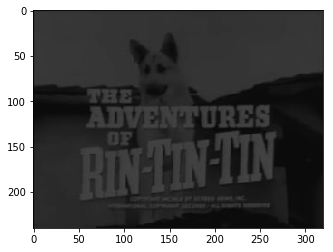

In [13]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

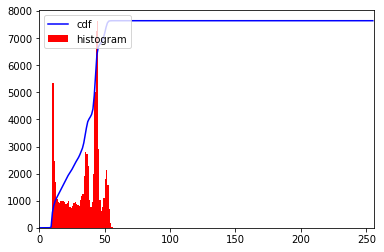

In [14]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

1) O histograma não aproveita bem as faixas de cores. Os pixels estão indo de 8 a 58, o certo seria de 0 a 255.

In [25]:
min_pix = np.min(rintin_gray)
max_pix = np.max(rintin_gray)
print(min_pix, max_pix)

8 58


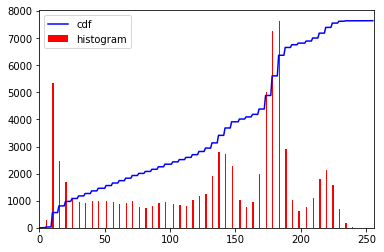

In [26]:
min = rintin_gray.min()
max = rintin_gray.max()
saida = rintin_gray.copy()

for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = ((rintin_gray[i][j] - min)*255)/(max-min)

hist,bins = np.histogram(saida.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(saida.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



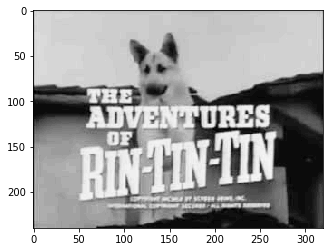

In [27]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [4]:
image = cv2.imread("hall_box_battery1.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

1. Não é possível identificar os canais a partir dos histogramas, pois mostram atividades em diferentes pixels. Por exemplo, em torno de 200, área de maior brilho o rodapé e a caixa estão se misturando.

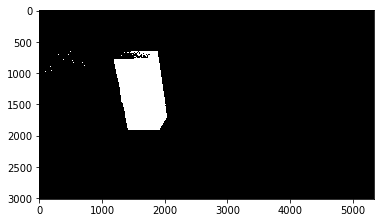

In [32]:
image_rgb_copy = image_rgb.copy()
for i in range(image_rgb_copy.shape[0]):
    for j in range(image_rgb_copy.shape[1]):
        if image_rgb_copy[i][j][0] > 130 and image_rgb_copy[i][j][1] < 110 and image_rgb_copy[i][j][2] < 110:
            image_rgb_copy[i][j] = [255,255,255]
        else:
            image_rgb_copy[i][j] = [0,0,0]
            
plt.imshow(image_rgb_copy);

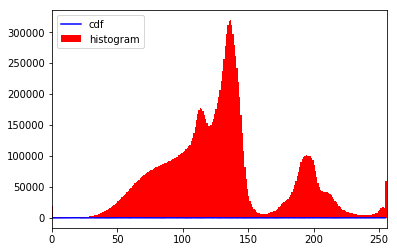

In [6]:
image_copy = image_rgb.copy()
red = image_copy[:,:,0]
# red[:, :, 0] = 0
# red[:, :, 1] = 0

blue = image_copy[:,:,2]
# blue[:, :, 2] = 0
# blue[:, :, 1] = 0



#Plot histograma canal vermelho
hist,bins = np.histogram(red.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(red.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



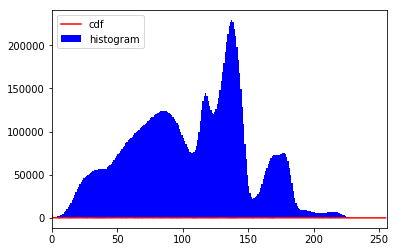

In [7]:
#Plot histograma canal azul
hist,bins = np.histogram(blue.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'r')
plt.hist(blue.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Atividade 3


Crie uma cópia da versão Grayscale figura acima, em que cada pixel  recebe a subtração entre o pixel que vem depois e o que vem antes dele. Apresente a imagem resultado. 

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t

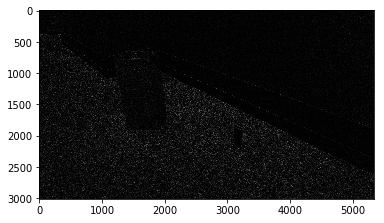

In [3]:
grid = cv2.imread("hall_box_battery1.jpg")
grid_rgb = cv2.cvtColor(grid, cv2.COLOR_BGR2RGB)
grid_rgb

grid_gray = cv2.cvtColor(grid, cv2.COLOR_BGR2GRAY)

grid_gray_copy = grid_gray.copy()

for i in range(1,grid_gray.shape[0] - 1):
    for j in range(1,grid_gray.shape[1] - 1):
        dif = int(grid_gray[i-1][j]) - int(grid_gray[i+1][j])
        
        grid_gray_copy[i][j] = abs(dif)
        
        
plt.imshow(grid_gray_copy, cmap="Greys_r");